In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newbies-datahack/jetson-sample-data.csv


In [4]:
data=pd.read_csv('/kaggle/input/newbies-datahack/jetson-sample-data.csv')


In [5]:
print(data.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
687906     True
687907     True
687908    False
687909    False
687910    False
Length: 687911, dtype: bool


In [6]:
data_range=data.loc[data['price']>0]
data_range.sort_values(by=['price'])

,client_id,order_id,item_name,quantity,price,date
91427,ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,T,1,0.01,2022-09-18
92286,ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,T,1,0.01,2023-03-02
461971,ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,Tip,1,0.01,2021-11-19
479003,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,T,1,0.01,2022-12-02
209285,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Gratuity,1,0.01,2021-08-13
...,...,...,...,...,...,...
532492,ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,$70 Family Style,57,3990.00,2022-05-19
167003,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,Impress the In-Laws,93,5208.00,2021-09-24
323495,ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,$70 Family Style,80,5600.00,2022-06-15
21355,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3...,$50 Brunch Family Style,125,6250.00,2022-09-04


In [7]:
unique=data['item_name'].unique()
l=data.groupby('item_name').item_name.count()
print(l)

item_name
 Coffeee Cake            67
$10 N/A Bev Package       1
$10 Upcharge              3
$15 Upcharge             23
$2 Oysters               25
                       ... 
rack of lamb             12
smash burger            178
summer peppers          412
sunset on damen        6060
whole dover sole          2
Name: item_name, Length: 2153, dtype: int64


In [8]:
from itertools import permutations

In [9]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [10]:
df = pd.read_csv('/kaggle/input/newbies-datahack/jetson-sample-data.csv')
df.head()

,client_id,order_id,item_name,quantity,price,date
0,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Cosmonaut,1,16.0,2022-01-24
1,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Krombacher,1,8.0,2022-01-24
2,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Ahi Tuna,1,23.0,2022-01-24
3,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Little Gem Salad,1,14.0,2022-01-24
4,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Fire Pie,1,20.0,2022-01-24


In [11]:
df.shape

(687911, 6)

In [12]:
df.columns

Index(['client_id', 'order_id', 'item_name', 'quantity', 'price', 'date'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687911 entries, 0 to 687910
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  687911 non-null  object 
 1   order_id   687911 non-null  object 
 2   item_name  687911 non-null  object 
 3   quantity   687911 non-null  int64  
 4   price      687911 non-null  float64
 5   date       687911 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.5+ MB


In [14]:
df.drop_duplicates(inplace = True)
df.shape

(615458, 6)

In [15]:
df['client_id'].unique()

array(['ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBiAgPC1uszNCww',
       'ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBiAgJTNwIzwCQw',
       'ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBifl8zYHAw',
       ...,
       'ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBiAgNTj9uPLCgw',
       'ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBiAgNSzxtDFCww',
       'ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3BfVmVudWVHcm91cENsaWVudBiAgNTj9p-CCAw'],
      dtype=object)

In [16]:
df['item_name'].unique().shape

(2153,)

In [17]:
d = dict(df['item_name'].value_counts())

new = pd.DataFrame(d.items(), columns=['Items', 'Frequency'])

# data = {'name': df['item_name'],'age': df['item_name'].value_counts()} 
# new = pd.DataFrame.from_dict(data)


index_names = new[ new['Items'] == 'Guest Love' ].index
graph = new[new['Frequency'] > 1000]

graph.drop(index_names, inplace = True)
graph.reset_index()
graph

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Items,Frequency
0,Focaccia,32457
1,Bubbling Shrimp,16100
3,Bucatini Cacio e Pepe,14324
4,Spicy Meatballs,13514
5,"The ""etta"" Chopped Salad",11609
...,...,...
131,Peace Lily,1076
132,Paloma - Mezcal,1068
133,French Toast,1062
134,Fettuccine,1058


In [18]:
new

,Items,Frequency
0,Focaccia,32457
1,Bubbling Shrimp,16100
2,Guest Love,15562
3,Bucatini Cacio e Pepe,14324
4,Spicy Meatballs,13514
...,...,...
2148,Aquapanna,1
2149,Electric Non Alcoholic,1
2150,Ostatu Gran Reserva,1
2151,Tuxedo No 2,1


In [19]:
import pickle
pickle.dump(new, open('new.pkl','wb'))

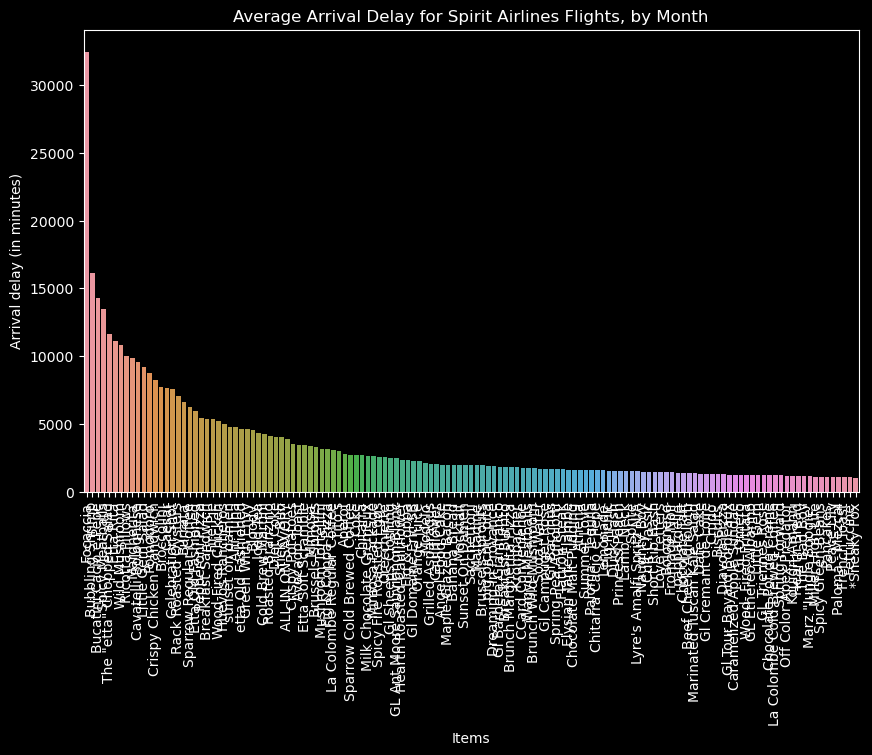

In [20]:
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

sns.barplot(x=graph['Items'], y=graph['Frequency'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

plt.tick_params(axis ='x', rotation = 90)

In [21]:
def recommend():
    
    np.where(graph.Items == 'Burrata')[0][0]
    
    return suggestion

In [22]:
x = df.groupby('client_id').count()['item_name'] > 1500
grouped_Users = x[x].index
grouped_Users

Index([], dtype='object', name='client_id')

In [23]:
# collab = pd.read_csv('/kaggle/input/newbies-datahack/jetson-sample-data.csv')
df[df['client_id'].isin(grouped_Users)]

,client_id,order_id,item_name,quantity,price,date


In [24]:
graph

,Items,Frequency
0,Focaccia,32457
1,Bubbling Shrimp,16100
3,Bucatini Cacio e Pepe,14324
4,Spicy Meatballs,13514
5,"The ""etta"" Chopped Salad",11609
...,...,...
131,Peace Lily,1076
132,Paloma - Mezcal,1068
133,French Toast,1062
134,Fettuccine,1058


In [25]:
# import pandas as pd
new.rename(columns = {'Items':'item_name'}, inplace = True)
result = pd.merge(df, new, on=['item_name'])
result.head()
# result = df.join(new, how="outer")

,client_id,order_id,item_name,quantity,price,date,Frequency
0,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Cosmonaut,1,16.0,2022-01-24,985
1,ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Cosmonaut,1,16.0,2022-01-25,985
2,ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Cosmonaut,1,16.0,2022-01-25,985
3,ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Cosmonaut,1,16.0,2022-01-25,985
4,ahNzfnNldmVucm9vbXMtc2VjdXJlciQLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Cosmonaut,1,16.0,2022-01-25,985


In [26]:
x = result.groupby('order_id').count()['Frequency'] > 20
highest_order_frequencies = x[x].index

In [27]:
filtered_data = result[result['order_id'].isin(highest_order_frequencies)]

In [28]:
y = filtered_data.groupby('item_name').count()['Frequency'] > 5
famous_dishes = y[y].index

In [29]:
final_data = filtered_data[filtered_data['item_name'].isin(famous_dishes)]

In [30]:
pt = final_data.pivot_table(index='item_name',columns='order_id',values='Frequency')

In [31]:
pt.fillna(0, inplace=True)

In [32]:
pt

order_id,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwY-9HriB0M,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwY-9iNyxoM,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwY-JHK7x8M,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwY-LWttR8M,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwY-LuI_BkM,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwY-MChlhwM,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwY-PjF0R4M,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwY-YHy7h4M,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwY-beCmx8M,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwY-fOqrx4M,...,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwYgIDs4-3V6AkM,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwYgIDs55367AoM,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwYgIDshpuyhAoM,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwYgIDslrm3-QoM,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwYgIDsnMqktgkM,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwYgIDsrczNigkM,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwYgIDsuYG0ogkM,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwYgIDswOXfuAoM,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwYgIDsws2-wQgM,ahNzfnNldmVucm9vbXMtc2VjdXJlcigLEhtuaWdodGxvb3BfUmVzZXJ2YXRpb25BY3R1YWwYgIDsz_jGlAgM
item_name,,,,,,,,,,,,,,,,,,,,,
$15 Upcharge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$3 Upcharge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$45 Lunch Family Style,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$50 Brunch Family Style,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$6 Upcharge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
marinated olives,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pappardelle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pig picnic pita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
similarity_scores = cosine_similarity(pt)

In [35]:
similarity_scores.shape

(484, 484)

In [36]:
def recommend (item):
    index = np.where(pt.index==item)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1], reverse=True)[1:6]
    
    for i in similar_items:
        print(pt.index[i[0]])

In [37]:
recommend('pig picnic pita')

Branzino
Crispy Chicken Sandwich
Corkage Btl
St. Germain
Btl Labaille Sancerre


In [38]:
recommend('Focaccia')

Bubbling Shrimp
Guest Love
Bucatini Cacio e Pepe
Spicy Meatballs
Ricotta Pillows


In [41]:
import pickle
pickle.dump(pt,open('pt.pkl','wb') )

In [44]:
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb') )